# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：常用聚类算法对比评估

## 挑战介绍

本周的课程讲解了近十种不同思路的聚类算法，最后一个挑战的目的是探索不同算法在不同形状数据集上的聚类效果和所需时间。

## 挑战知识点

- 算法对数据形状的适应性
- 相同条件下的算法计算效率

---

## 挑战内容

### 生成测试数据

挑战前，需要先生成测试数据，我们使用 `make_moons(), make_circles(), make_blobs()` 生成 3 组数据。

---

**<font color='red'>挑战</font>：** 使用 sklearn 生成 3 组测试数据，并绘制出散点图（横排拼接子图）。

**<font color='blue'>规定</font>**：

- 为了方便后续实验，你需要对 3 组测试数据进行 Min-Max 归一化处理，使得横纵坐标都在 0-1 的范围之内。
- 3 种方法对应的参数如下：
    - 三组数据均包含 `100` 个样本，且将随机数种子均设为 `10`。
    - moons 和 circles 数据添加 `0.1` 的噪声。
    - circles 数据内外圈间距比例因子设为 `0.3`。
    - blobs 数据拥有 2 个簇，且簇标准差设为 `1.5`。
    - 其余参数取默认值。

In [ ]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline

### 代码开始 ### ((≈ 7-10 行代码))
moons, _ = datasets.make_moons(n_samples=100, noise=.1, random_state=10)
circles, _ = datasets.make_circles(n_samples=100, noise=.1, factor=.3, random_state=10)
blobs, _ = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=10)

# Min-Max 归一化
moons = (moons - np.min(moons)) / (np.max(moons) - np.min(moons))
circles = (circles - np.min(circles)) / (np.max(circles) - np.min(circles))
blobs = (blobs - np.min(blobs)) / (np.max(blobs) - np.min(blobs))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
axes[0].scatter(moons[:, 0], moons[:, 1])
axes[1].scatter(circles[:, 0], circles[:, 1])
axes[2].scatter(blobs[:, 0], blobs[:, 1])
### 代码结束 ###

**期望输出：**

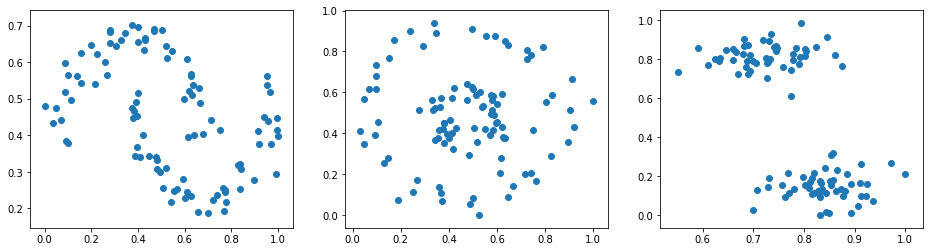

### 聚类结果对比

接下来，拟选用 sklearn 提供的几种常用的聚类方法在上面 3 个数据集上测试聚类效果，这些聚类方法有：

- `cluster.KMeans()`
- `cluster.MiniBatchKMeans()`
- `cluster.AffinityPropagation()`
- `cluster.MeanShift()`
- `cluster.SpectralClustering()`
- `cluster.AgglomerativeClustering()`
- `cluster.Birch()`
- `cluster.DBSCAN()`

---

**<font color='red'>挑战</font>：** 采用上述 8 个聚类方法分别在 moons, circles 和 blobs 上进行测试，并将聚类结果绘制成图。

**<font color='blue'>规定</font>**：本次挑战不规定参数，请根据前面学习的内容使得聚类效果尽量更好。

In [ ]:
from sklearn import cluster

### 代码开始 ### (> 10 行代码)
cluster_names = ['KMeans', 'MiniBatchKMeans', 'AffinityPropagation', 
                 'MeanShift', 'SpectralClustering', 'AgglomerativeClustering', 'Birch', 'DBSCAN']

cluster_estimators = [
    cluster.KMeans(n_clusters=2),
    cluster.MiniBatchKMeans(n_clusters=2),
    cluster.AffinityPropagation(),
    cluster.MeanShift(),
    cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=6),
    cluster.AgglomerativeClustering(n_clusters=2),
    cluster.Birch(n_clusters=2, threshold=.1),
    cluster.DBSCAN(eps=.1, min_samples=6, metric='euclidean')
]

for algorithm_name, algorithm in zip(cluster_names, cluster_estimators):
    
    moons_clusters = algorithm.fit_predict(moons)
    circles_clusters = algorithm.fit_predict(circles)
    blobs_clusters = algorithm.fit_predict(blobs)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
    axes[0].scatter(moons[:, 0],moons[:, 1], c=moons_clusters)
    axes[1].scatter(circles[:, 0],circles[:, 1], c=circles_clusters)
    axes[2].scatter(blobs[:, 0],blobs[:, 1], c=blobs_clusters)
    axes[0].set_ylabel('{}'.format(algorithm_name))
### 代码结束 ###

**参考输出：**

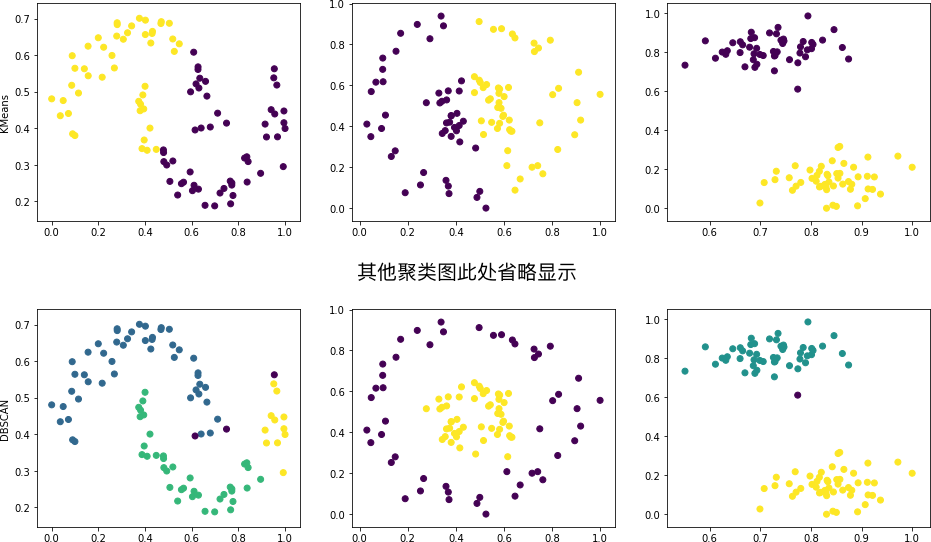

上图中，我们一般只能得出同一种方法在不同数据集上聚类效果好坏的结论。由于不同方法之间的聚类效果取决于具体的参数，所以并不能准确得到谁好谁坏的结果，只能作为参考。

接下来，我们想测试不同方法在不同数量级的数据集上执行速度的快慢对比。这一次，我们仅使用 `make_blobs()` 生成团状测试数据。生成测试数据的函数如下：

In [ ]:
def create_data(n):
    """
    参数:
    n -- 生成样本数量
    返回:
    blobs_data -- 样本数组
    """
    blobs_data, _ = datasets.make_blobs(
        n_samples=n,
        n_features=2,
        centers=2,
        cluster_std=1.5,
        random_state=10)
    return blobs_data

**<font color='red'>挑战</font>：** 使用 `create_data(n)` 生成不同规模的测试数据，并计算不同算法的聚类时间，且绘制对应的折线图。

**<font color='blue'>规定</font>**：

- 生成数据规模依次为：100, 200, 300, ···, 900, 1000 等 10 组。
- 除指定 `n_clusters=2` 之外，其余参数均使用相关方法的默认参数。

**<font color='green'>提示</font>**：可以通过 time 模块记录算法运行时间，例如：

```python
import time

t0 = time.time()
cluster_estimator.fit()
t1 = time.time()
```

则 `t1-t0` 即为 `cluster_estimator.fit()` 所花费时间。

In [ ]:
import time

### 代码开始 ### (> 10 行代码)
cluster_names = ['KMeans', 'MiniBatchKMeans', 'AffinityPropagation', 
                 'MeanShift', 'SpectralClustering', 'AgglomerativeClustering', 'Birch', 'DBSCAN']

cluster_estimators = [
    cluster.KMeans(n_clusters=2),
    cluster.MiniBatchKMeans(n_clusters=2),
    cluster.AffinityPropagation(),
    cluster.MeanShift(),
    cluster.SpectralClustering(n_clusters=2),
    cluster.AgglomerativeClustering(n_clusters=2),
    cluster.Birch(n_clusters=2),
    cluster.DBSCAN()
]

cluster_t_list = []
for algorithm_name, algorithm in zip(cluster_names, cluster_estimators):
    t_list = []
    for num in [i for i in range(100, 1000, 100)]:
        data = create_data(num) # 生成数据
        t0 = time.time()
        moons_clusters = algorithm.fit(data)
        t1 = time.time()
        t_list.append(t1 - t0) # 计算聚类时间
    print("{} fitted & average time:{:4f}".format(algorithm_name, np.mean(t_list)))
    cluster_t_list.append(t_list)

plt.figure(figsize=(12, 6))
for cluster_t, cluster_name in zip(cluster_t_list, cluster_names):
    plt.plot(cluster_t, marker='.', label=cluster_name)
    plt.legend()
### 代码结束 ###

**参考输出：**

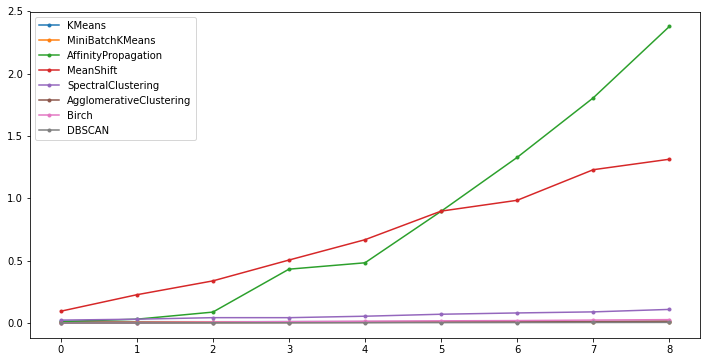

可以发现，Affinity Propagation，Mean Shift 以及 Spectral Clustering 花费时间上升速度较快，也是比较耗时的聚类算法。

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>